##Previsão de Preços de Casas com Keras

**Objetivos:**

Construir um modelo de rede neural para prever o preço de casas com base em suas características, utilizando o conjunto de dados boston_housing da  biblioteca Keras.

**Materiais, Métodos e Ferramentas:**

Para realizar esta prática, utilizaremos o Google Colab, que oferece um ambiente de desenvolvimento interativo e baseado em nuvem, facilitando a execução de código em Python.


In [ ]:
#Importar as bibliotecas necessárias:
import numpy as np
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop

In [ ]:
# Carregue os dados de treinamento e teste
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

# Normalização dos dados
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)

x_train -= mean
x_train /= std
x_test -= mean
x_test /= std


57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#Vamos construir um modelo de rede neural sequencial com duas camadas ocultas e uma camada de saída:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # Saída única para previsão de preço


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Compile o Modelo
#A compilação do modelo é o passo onde definimos o otimizador, a função de perda e as métricas de avaliação:

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

#Aqui, usamos o otimizador adam, a perda de erro quadrático médio (mse), e como métrica adicional, o erro absoluto médio (mae).


In [ ]:
#vamos treinar o modelo com os dados de treinamento. Definiremos também o número de épocas para o treinamento:
history = model.fit(x_train, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=1)

#o modelo será treinado por 100 épocas com um batch_size de 16 e 20% dos dados serão utilizados para validação.


In [ ]:
#Após o treinamento, avaliaremos o desempenho do modelo nos dados de teste:
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')


Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.0565 - mae: 1.2366 - val_loss: 16.4821 - val_mae: 2.5252
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.4263 - mae: 1.0940 - val_loss: 16.9122 - val_mae: 2.5665
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.9604 - mae: 1.1605 - val_loss: 16.6938 - val_mae: 2.5371
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.5158 - mae: 1.2400 - val_loss: 16.2717 - val_mae: 2.6160
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.5386 - mae: 1.1263 - val_loss: 16.3719 - val_mae: 2.5273
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.6736 - mae: 1.1209 - val_loss: 17.1492 - val_mae: 2.5704
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.9005 - mae: 1.1834 - val_loss: 16.8841 - val_mae: 2.5568
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.5746 - mae: 1.1028 - val_loss: 16.6229 - val_mae: 2.5998
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - los

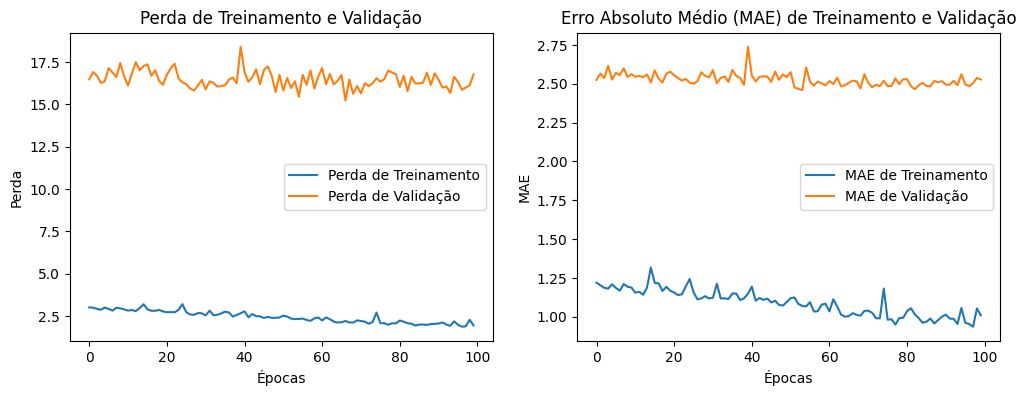

In [9]:
#Análise do Modelo

import matplotlib.pyplot as plt

# Assuming 'model' and 'x_train', 'y_train', 'x_test', 'y_test' are defined
history = model.fit(x_train, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=1) # Retrain the model to get history


# Plotando a perda de treinamento e validação
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perda de Treinamento')
plt.plot(history.history['val_loss'], label='Perda de Validação')
plt.title('Perda de Treinamento e Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='MAE de Treinamento')
plt.plot(history.history['val_mae'], label='MAE de Validação')
plt.title('Erro Absoluto Médio (MAE) de Treinamento e Validação')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()

plt.show()